# **I. Project Introduction**

In this project, I will apply data analytic tools to the stock market. More specifically, I will explore the trends and relationships between Intel and AMD stocks (INTC, AMD) in the past year, and finally, I will test the effectiveness of analytic indicator bollinger bands in forecasting stock price movements.

First thing first, I will need to retrieve data of the two stocks of interest. Unfortunately, all mainstream API for acquiring stock quotes (NASDAQ etc.) are all proprietary and need a token to access. As a result, for this project, I will use a python module called yfinance, which simulates the Yahoo Finance API before Yahoo discontinued its service.

In [1]:
import requests
import pandas as pd
import json 
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np


In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=e8ec1a177b6745218d4548a053912549261983d1ef8ac12683f71dc31eeb9441
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf

# retrieving data from yahoo finance
data = yf.download(tickers = "INTC AMD", start="2019-12-31", end= "2021-01-01" ,interval = "1d")
stock_prices = pd.DataFrame(data)

# check size
stock_prices.info()


[*********************100%***********************]  2 of 2 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-31 to 2020-12-31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMD)   254 non-null    float64
 1   (Adj Close, INTC)  254 non-null    float64
 2   (Close, AMD)       254 non-null    float64
 3   (Close, INTC)      254 non-null    float64
 4   (High, AMD)        254 non-null    float64
 5   (High, INTC)       254 non-null    float64
 6   (Low, AMD)         254 non-null    float64
 7   (Low, INTC)        254 non-null    float64
 8   (Open, AMD)        254 non-null    float64
 9   (Open, INTC)       254 non-null    float64
 10  (Volume, AMD)      254 non-null    int64  
 11  (Volume, INTC)     254 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 25.8 KB


# **II. Preliminary Hypothesis for Part 1**
After retrieving the data, a question arised. How will theses two stocks move with respect to one another. Since these two companies are main competitors of each other, I hypothesize that their stock prices will have opposite movements from each other. That is, when INTC goes up, AMD goes down, and vice versa.

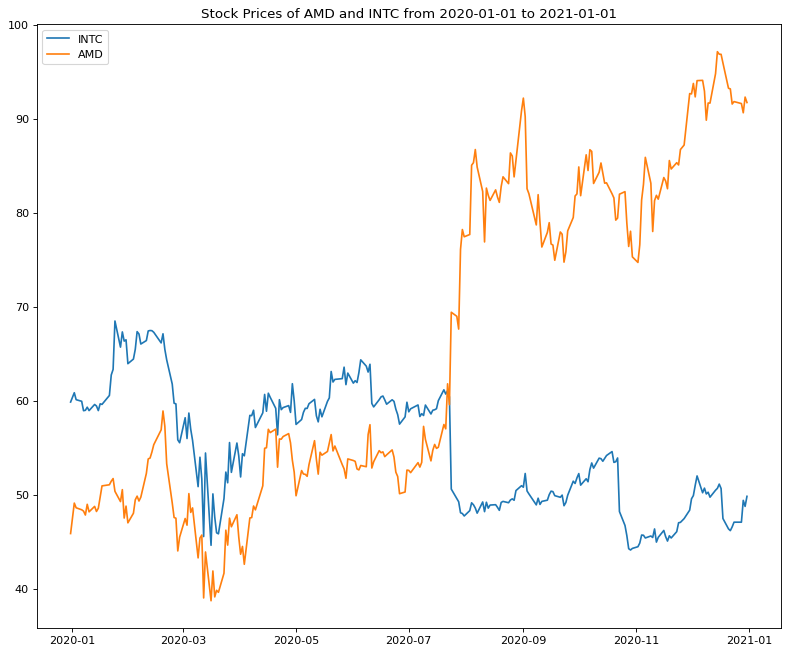

In [6]:
# We will take a look at the rough relationship between these two by quickly ploting them
closing = stock_prices.loc[:,"Close"]
amd = closing.loc[:,"AMD"]
intel = closing.loc[:,"INTC"]
time = closing.index
plt.set_ylabel = "Stock Price in $"
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time,intel, label = "INTC")
plt.plot(time,amd, label = "AMD")
plt.title("Stock Prices of AMD and INTC from 2020-01-01 to 2021-01-01")
plt.legend()
plt.show()

From this rough plot, we can see that INTC and AMD actually had very similar movements up until mid-to-late July, after which these two stocks almost acted as mirror opposite of one another. But when and why did this happen? What caused this divergence?

# **III. Develop Hypothesis for Part 1**
**Now I will hypothesize that the direct opposite price movements started due to new technology released from AMD, instead of the bullish market run.**

To achieve this, I will focus in on these two stocks from 2020-07-01 to 2020-09-01, and use index fund SPY, a reliable indicator of the market, as a benchmark to compensate for the gain/loss due to market perferomance. Since a good market performance has an positive influence on blue chip stocks like AMD and INTC

[*********************100%***********************]  1 of 1 completed


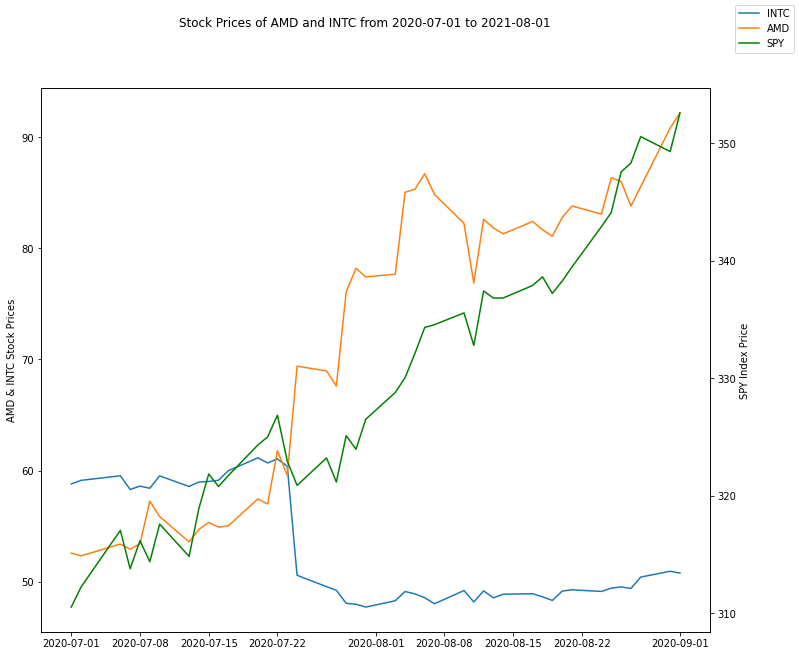

In [ ]:
# first we need to retrieve the S&P index with code "SPY" using yfinance

spy = pd.DataFrame(yf.download(tickers = "SPY", start="2020-07-01", end= "2020-09-02" ,interval = "1d")).loc[:,"Close"]

# since the index of the dataframe is a timestamp type, we can slice it quite easily
amd_new = amd.loc[(amd.index < dt.datetime.strptime("2020-09-02", "%Y-%m-%d")) & (amd.index > dt.datetime.strptime("2020-06-30", "%Y-%m-%d"))]
intel_new = intel.loc[(intel.index < dt.datetime.strptime("2020-09-02", "%Y-%m-%d")) & (intel.index > dt.datetime.strptime("2020-06-30", "%Y-%m-%d"))]

# after we get all the variables needed, we need to compensate the effect of market performance from these two stocks.
time_new = amd_new.index
fig = plt.figure()
fig.set_size_inches(12,10)
ax1 = fig.add_subplot()
ax1.plot(time_new, intel_new, label = "INTC")
ax1.plot(time_new, amd_new, label = "AMD")
ax1.set_ylabel('AMD & INTC Stock Prices')

ax2 = ax1.twinx()
ax2.plot(time_new, spy, color="g", label = "SPY")
ax2.set_ylabel('SPY Index Price')
fig.suptitle("Stock Prices of AMD and INTC from 2020-07-01 to 2021-08-01")
fig.legend()
fig.show()


[*********************100%***********************]  1 of 1 completed


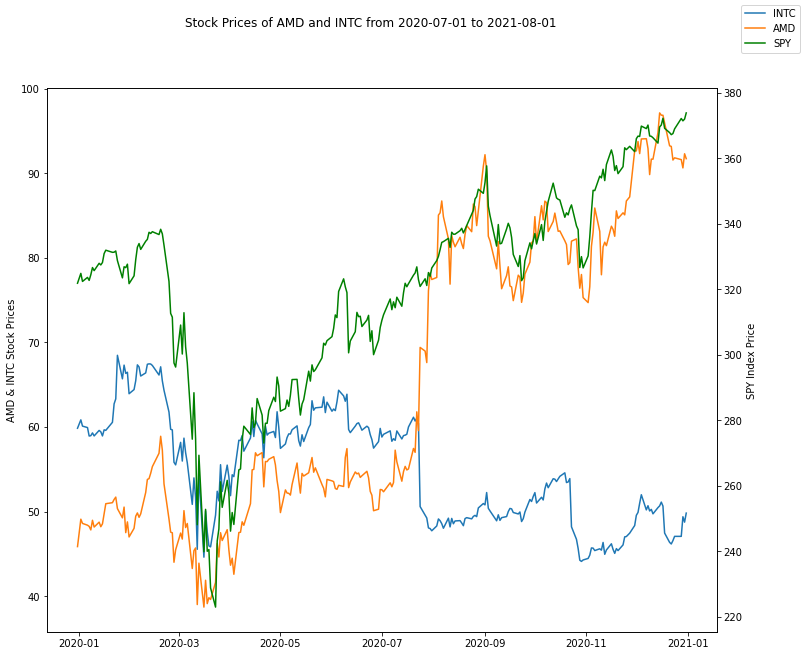

In [7]:
spy = pd.DataFrame(yf.download(tickers = "SPY", start="2019-12-31", end= "2021-01-01" ,interval = "1d")).loc[:,"Close"]


# after we get all the variables needed, we need to compensate the effect of market performance from these two stocks.
time = amd.index
fig = plt.figure()
fig.set_size_inches(12,10)
ax1 = fig.add_subplot()
ax1.plot(time, intel, label = "INTC")
ax1.plot(time, amd, label = "AMD")
ax1.set_ylabel('AMD & INTC Stock Prices')

ax2 = ax1.twinx()
ax2.plot(time, spy, color="g", label = "SPY")
ax2.set_ylabel('SPY Index Price')
fig.suptitle("Stock Prices of AMD and INTC from 2020-07-01 to 2021-08-01")
fig.legend()
fig.show()


From the graph, we can see that the jump of AMD and plummet of INTC happened at the same time, right after 2020-07-22, which is when AMD announced to release its new line of processors based on its 7-nanometer architecture while Intel pushed back the release date of its new chip. However, the introduction of the index fund SVP further complicates the issue. As we can see, the movement of AMD actually aligns very well with the movement of SVP. So is the jump of AMD the result of the bull market?

# **IV. Further Demonstration for Part 1**
To find out about this issue, we need to zoom in further into the week of 2020-07-22 (7/20 - 24), where the magic happened, and see weather the movements in AMD is the product of the high-performing market.

In [ ]:
# We will get the stock prices again with yfinance
amd_week = yf.download(tickers = "AMD", start="2020-7-19", end= "2020-07-25" ,interval = "1d").loc[:,"Close"]
intel_week = yf.download(tickers = "INTC", start="2020-7-19", end= "2020-07-25" ,interval = "1d").loc[:,"Close"]
spy_week = yf.download(tickers = "SPY", start="2020-7-19", end= "2020-07-25" ,interval = "1d").loc[:,"Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


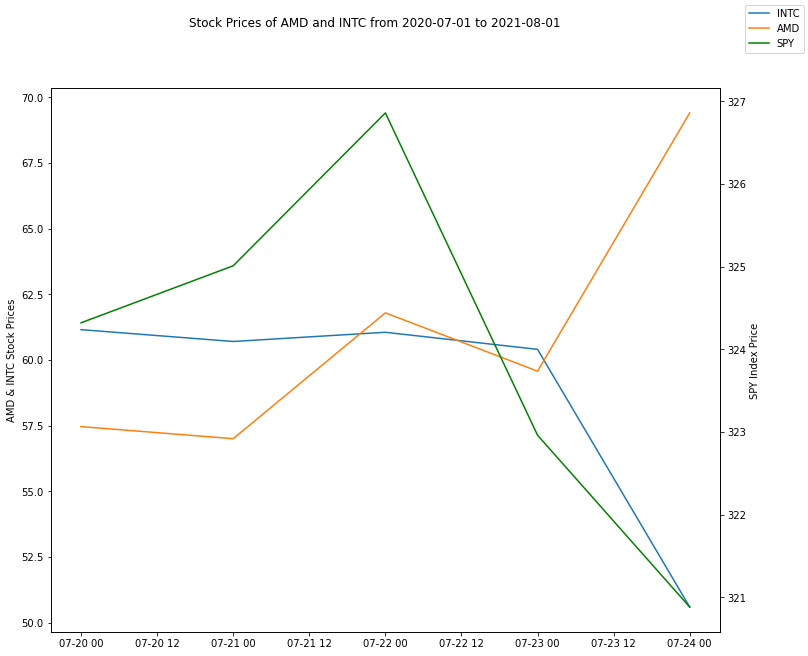

In [ ]:
# plotting
fig = plt.figure()
fig.set_size_inches(12,10)
ax1 = fig.add_subplot()
ax1.plot(intel_week, label = "INTC")
ax1.plot(amd_week, label = "AMD")
ax1.set_ylabel('AMD & INTC Stock Prices')
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end))

ax2 = ax1.twinx()
ax2.plot(spy_week, color="g", label = "SPY")
ax2.set_ylabel('SPY Index Price')
fig.suptitle("Stock Prices of AMD and INTC from 2020-07-20 to 2020-07-24")
fig.legend()
fig.show()

As seen in the graph, both the SPY and INTC fell after 7/22, yet AMD rose. It can be concluded that the rise in share price in AMD is purely due to its announcement to release its new line of processors, but not due to market performance.

# **V. Testing Technical Analysis Indicator - Bollinger Band**
According to Investopedia, "a Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price". It can be effective to see whether a stock is over bought or over sold.



# Formula for Bollinger Band
The calculation of Bollinger Band is divided into 4 parts
1. Standard Deviation of the stock prices in a given period of time.
2. Mean of the stock prices in a given period of time, called a moving average.
3. Upperband = Moving average + n * standard deviation
4. Lowerband = Moving average - n * standard deviation

Note: n can be tweak by the users, for the sake of consistency, I would use n = 2 for this project.

Now I am going to implement this in python :)


In [ ]:
# First to experiment, I would use INTC as a test subject
INTC = pd.DataFrame(yf.download(tickers = "INTC", start="2019-12-31", end= "2021-01-01" ,interval = "1d"))


[*********************100%***********************]  1 of 1 completed


In [ ]:
# now we calculate the upper and lower bands of the stocks movements
INTC["MA"] = INTC["Close"].rolling(12).mean()
INTC["Std"] = INTC["Close"].rolling(12).std()
INTC["Upper"] = INTC["MA"] + 1.5 * INTC["Std"]
INTC["Lower"] = INTC["MA"] - 1.5 * INTC["Std"]
INTC = INTC[11:] # this is to eliminate the nulls in the first twelve days

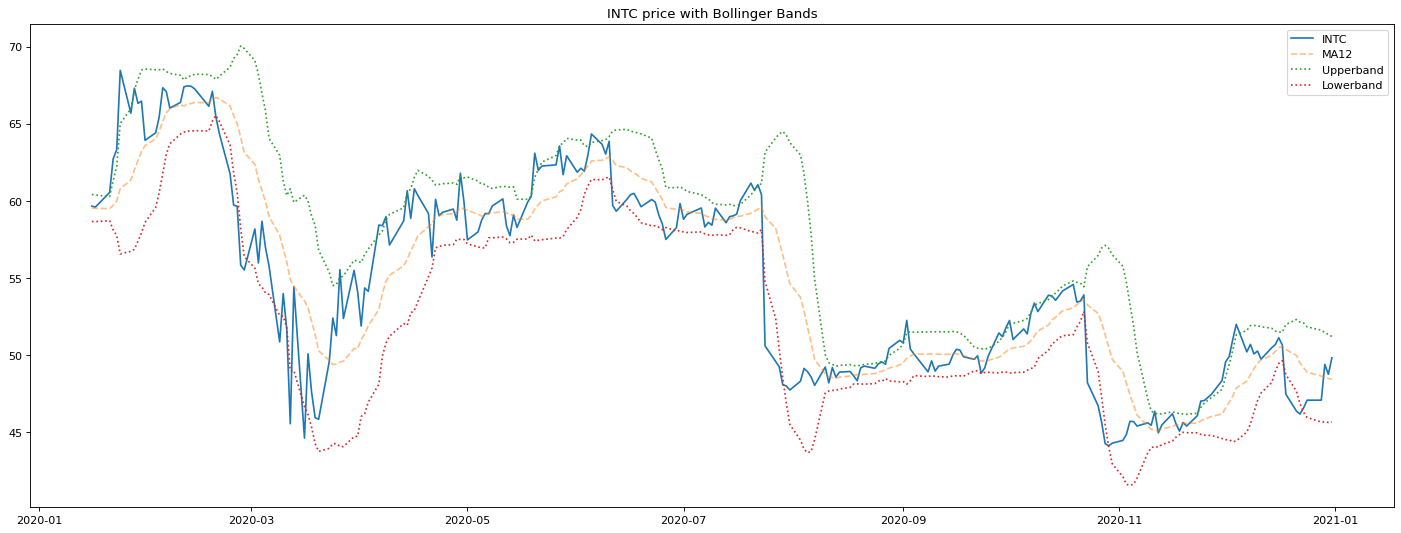

In [ ]:
# now we graph these
time = INTC.index
plt.set_ylabel = "$"
plt.figure(num=None, figsize=(22, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time,INTC["Close"], label = "INTC")
plt.plot(time,INTC["MA"], "--",label = "MA12",alpha=0.5)
plt.plot(time,INTC["Upper"],":", label = "Upperband")
plt.plot(time,INTC["Lower"], ":", label = "Lowerband")
plt.title("INTC price with Bollinger Bands")
plt.legend()
plt.show()

As we can see from the graph, the stock price oscillates within the two bands, and when the stocks goes outside of these two bands, it usually come back in quite quickly. Now I wonder, am I able to calculate the accuracy of the prediction taken from the Bollinger Bands that if the stocks moves outside the bands, it would return back in quite quickly. For the sake of this consistency, we would hypothesize that when the stock price goes out of bound, it will readjust and return to the bound in 3 days.

In [ ]:
# first we come up with a column to determine whether the price is within in the bound
INTC["Inside"] = ((INTC["Close"] >= INTC['Lower']) & (INTC["Close"] <= INTC["Upper"]))

In [4]:
# writing a function to find out the exceptions and their lengths
def checkFalse(booList):
  lengthList = []
  count = 0
  for i in range(len(booList)):
    if booList[i] == False:
      count += 1
    elif booList[i] == True and count > 0:
      lengthList.append(count)
      count = 0
    if i==len(booList)-1 and count>0:
      lengthList.append(count)
  return lengthList

In [ ]:
# Check the exceptions
exceptions = checkFalse(INTC["Inside"])
falsePrediction = 0
for item in exceptions:
  if item > 3:
    falsePrediction += 1
accuracy = (1 - float(falsePrediction/len(exceptions)))*100
print(accuracy)

66.66666666666667


As we can see, in the case of intel, given 3 days grace period, the bellinger bands is 67% accurate. That is, when the stock price goes over or under the bollinger bands, it has a 67% chance to return back within 3 days, making it quite a reliable tool to speculate a turbulent market, especially today. Now I wonder how this test will hold up in other stocks cases.

# **VI. Applying the Bollinger Band tests to other stocks**
**Hypothesis: Companies that have larger market cap will have a higher accuracy in the test, since they tend to grow more consistently, thus making them more predictable.**

To do so, we will first write the function for the test.

In [5]:
def checkAccuracy(stockDict, n, g):
  # ticker is the stock symbol, n is the bellinger band range (mentioned in the formula), g is the grace period
  accuracydict = {}
  for ticker in stockDict:
    stock = stockDict[ticker]
    stock["MA"] = stock["Close"].rolling(12).mean()
    stock["Std"] = stock["Close"].rolling(12).std()
    stock["Upper"] = stock["MA"] + n * stock["Std"]
    stock["Lower"] = stock["MA"] - n * stock["Std"]
    stock = stock[11:]
    stock["Inside"] = ((stock["Close"] >= stock['Lower']) & (stock["Close"] <= stock["Upper"]))

    outlier = checkFalse(stock["Inside"])
    falsePrediction = 0
    for item in outlier:
      if item > g:
        falsePrediction += 1
    try:
      accuracy = (1 - (falsePrediction/len(outlier)))*100
    except:
      accuracy = 0
    accuracydict[ticker] = {"Accuracy" : accuracy}
  return accuracydict

# this is for accquring the stocks
def getStock(stockList):
  quiry = ""
  large = {}
  for ticker in stockList:
    large[ticker] = pd.DataFrame(yf.download(ticker, start="2019-12-31", end= "2021-01-01" ,interval = "1d"))
  return large

# add marketcap
def getMarketCap(a,stockList):
  for i in range(len(stockList)):
    try:
      a[stockList[i]]["MarketCap"] = yf.Ticker(stockList[i]).info["marketCap"]
    except:
      a[stockList[i]]["MarketCap"] = 0
  return a

Now we need to compile a large list of stock tickers to be examined, from the internet, I found this almost complete list of all public companies from https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq&letter=0&render=download, and we will take a snippet of around 50 to test. My initial hypothesis would be the bollinger test rate would return a higher percentage if the company's market cap is larger, since the larger the company, more stable the growth.

In [ ]:
l = []
with open("/content/nasdaq.csv") as f:
  f.readline()
  for lines in f:
    l.append(lines.strip().split(",")[0])
print(l)
stockList = l[0:100]
g = getStock(stockList)
complete = getMarketCap(checkAccuracy(g,1.5,3),stockList)
print(complete)





Average accuracy is 83.91961574555549%


Text(0.5, 1.0, 'Correlation between Bollinger Band Test and Market Cap')

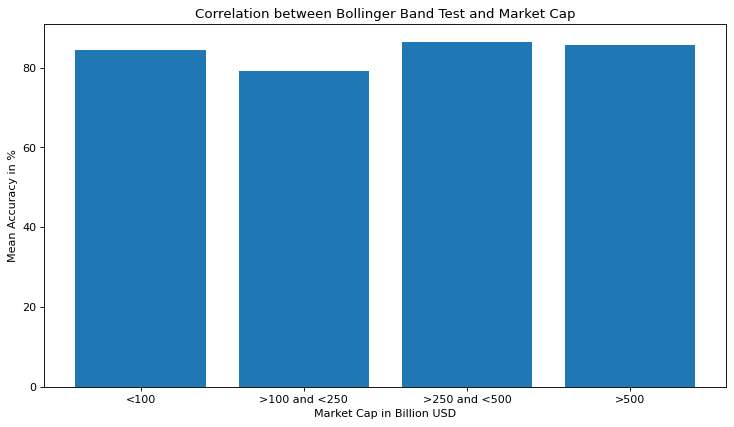

In [15]:
# After compiling all the infos we have the format {ticker: {accuracy, marketcap}}, now we will take a look at the correlation between the marketcap and bollinger band test results
final = pd.DataFrame(complete)
final = final.T

final1 = final[final.loc[:,"MarketCap"] <= (100*1000**3)]["Accuracy"].mean()
final2 = final[((final.loc[:,"MarketCap"] < (250*1000**3)) & (final.loc[:,"MarketCap"] > (100*1000**3)))]["Accuracy"].mean()
final3 = final[((final.loc[:,"MarketCap"] < (500*1000**3)) & (final.loc[:,"MarketCap"] > (250*1000**3)))]["Accuracy"].mean()
final4 = final[final.loc[:,"MarketCap"] >= (500*1000**3)]["Accuracy"].mean()
print("Average accuracy is {}%".format(sum([final1, final2, final3, final4])/4))

plt.figure(num=None, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(["<100",">100 and <250",">250 and <500",">500"],[final1,final2,final3,final4],width=0.8,align="center")
plt.xlabel("Market Cap in Billion USD")
plt.ylabel("Mean Accuracy in %")
plt.title("Correlation between Bollinger Band Test and Market Cap")

Text(0.5, 1.0, 'Company market cap distribution')

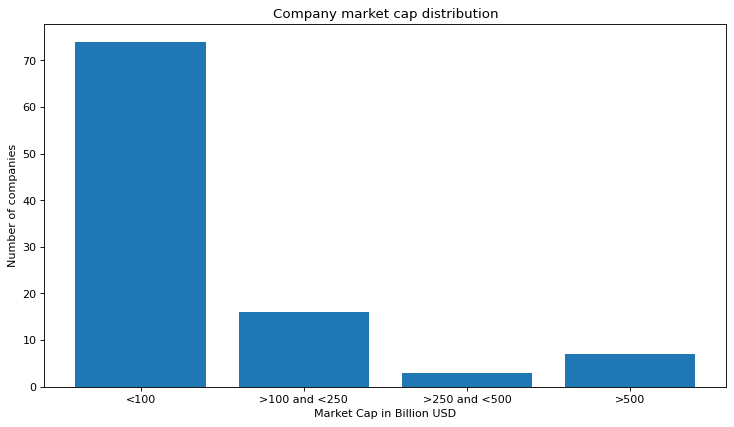

In [17]:
size1 = len(final[final.loc[:,"MarketCap"] <= (100*1000**3)])
size2 = len(final[((final.loc[:,"MarketCap"] < (250*1000**3)) & (final.loc[:,"MarketCap"] > (100*1000**3)))])
size3 = len(final[((final.loc[:,"MarketCap"] < (500*1000**3)) & (final.loc[:,"MarketCap"] > (250*1000**3)))])
size4 = len( final[final.loc[:,"MarketCap"] >= (500*1000**3)]["Accuracy"])

plt.figure(num=None, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(["<100",">100 and <250",">250 and <500",">500"],[size1,size2,size3,size4],width=0.8,align="center")
plt.xlabel("Market Cap in Billion USD")
plt.ylabel("Number of companies")
plt.title("Company market cap distribution")

As we can see from the plot, there is no direct correlation between market cap and bellinger band test. Companies of different sizes have around the same mean Accuracy. As a result, bellinger band is very useful in the more turbulent markets.

# **VII. Conclusion**

In this project, we examined the relationship between stock price movement of INTC and AMD this year, and tested the reliability of Bollinger Bands as a technical indicator in stock analysis. We tested three hypotheses: 
1. Since AMD and INTC are main competitor in the market, their stocks prices will move against easch other.
2. The great divergence of AMD and INTC in late July was due to AMD's announcement of new products, instead of the product of bullish market.
3. Bollinger Band will be a more reliable technical analysis tool in companies with larger market cap due to their stability and long time in the market.

After a series of tests and data analysis, we concluded that:
1. AMD and INTC only started moving against each other after July this year, before which they have been moving with the market for the past year.
2. AMD's bull run was not the result of the bull market, but solely because of its new products and Intel's delay in their products.
3. Bollinger band proves to be reliable in companies in all market caps, and there must be other factors that caused inconsistencies instead of how large the companies are.

Things I would love to do but couldn't:
1. Introduce more factors that could affect movements of stocks and do analysis on their influence. But this is out of my capability, and for the scope of this project, I was only able to tackle market cap.
2. Introduce more stocks into my test. I did not really have the knowledge or time to learn superior algorithms, and due to that, my codes, especially in bollinger band test part, were quite inefficient, which limited my capability.
3. I wish there are more stock market API available, since most of them in the market required membership, my only option was yfinance, which did the job fine, but some of its features were incredibily slow (the Ticker module especially). 
4. In the future, I would love to learn how to optimize my algorithm, webscrap datasets without API, and apply Machine Learning to add more depth to my future projects!